# Pr√©diction du Cancer du Sein - DigiScia Summer BootCamp

√Ä l‚Äô√©chelle mondiale, le cancer du sein est le type de cancer le plus courant chez les femmes et le deuxi√®me en termes de taux de mortalit√©. Le diagnostic du cancer du sein est r√©alis√© lorsqu‚Äôune masse anormale est d√©tect√©e (par auto-examen ou radiographie) ou lorsqu‚Äôun petit d√©p√¥t de calcium est observ√© (√† la radiographie). Lorsqu‚Äôune masse suspecte est d√©couverte, le m√©decin proc√®de √† un diagnostic pour d√©terminer s‚Äôil s‚Äôagit d‚Äôun cancer et, le cas √©ch√©ant, s‚Äôil s‚Äôest propag√© √† d‚Äôautres parties du corps.

Ce jeu de donn√©es sur le cancer du sein a √©t√© obtenu aupr√®s des **h√¥pitaux de l‚ÄôUniversit√© du Wisconsin, √† Madison, par le Dr William H. Wolberg**.

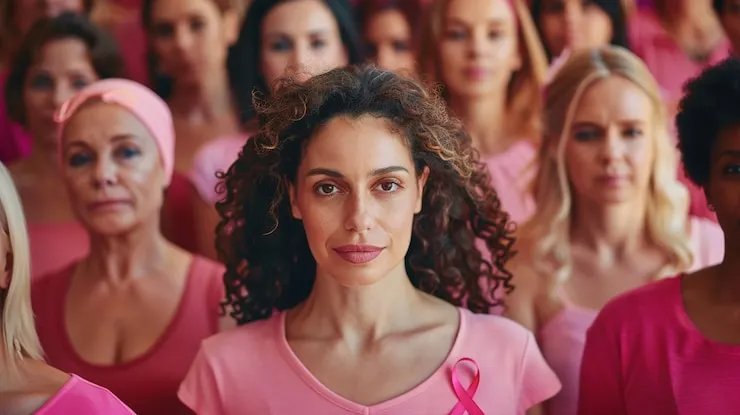

# 1. IMPORTATION DES BIBLIOTH√àQUES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Configuration pour l'affichage
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 2. CHARGEMENT ET EXPLORATION DES DONN√âES

In [2]:
# Chargement des donn√©es
df = pd.read_csv('data/Breast_cancer_data.csv')

print(f"‚úì Donn√©es charg√©es: {df.shape[0]} √©chantillons, {df.shape[1]} caract√©ristiques")
print(f"‚úì Colonnes: {list(df.columns)}")


‚úì Donn√©es charg√©es: 569 √©chantillons, 6 caract√©ristiques
‚úì Colonnes: ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']


In [3]:
# Aper√ßu des donn√©es
print("\nüìã Aper√ßu des premi√®res lignes:")
df.head()


üìã Aper√ßu des premi√®res lignes:


mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0

In [4]:
print("\nüìä Informations sur le dataset:")
df.info()

print("\n\n")
print("\nüìà Statistiques descriptives:")
df.describe()


üìä Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB




üìà Statistiques descriptives:


mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness   diagnosis  
count       569.000000  569.000000  
mean          0.096360    0.627417  
std           0.014064    0.483918  
min           0.052630    0.000000  
25%           0.086370    0.000000  
50%           0.095870    1.000000  
75%           0.105300    1.000000  
max           0.163400    1.000000


üìä √âTAPE 2: Analyse exploratoire des donn√©es
--------------------------------------------------
üéØ Distribution de la variable cible (diagnosis):
‚úì B√©nin (0): 212 cas (37.3%)
‚úì Malin (1): 357 cas (62.7%)


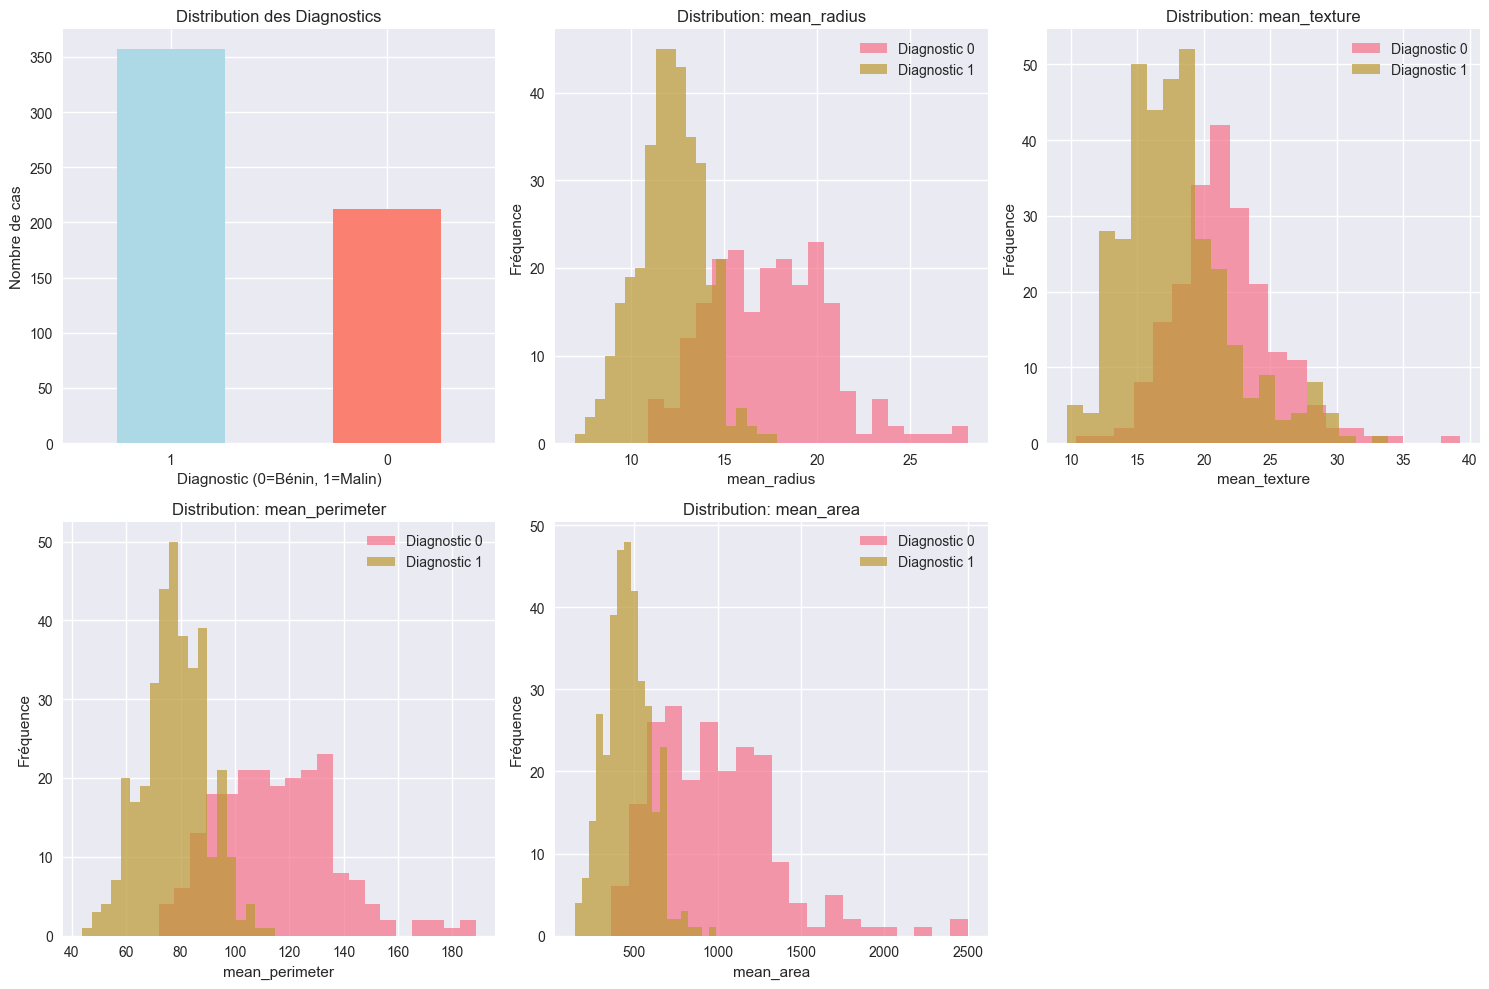

In [5]:
# 3. ANALYSE EXPLORATOIRE DES DONN√âES (EDA)
# =========================================
print("\nüìä √âTAPE 2: Analyse exploratoire des donn√©es")
print("-" * 50)

# Distribution de la variable cible
print("üéØ Distribution de la variable cible (diagnosis):")
target_counts = df['diagnosis'].value_counts()
print(f"‚úì B√©nin (0): {target_counts[0]} cas ({target_counts[0]/len(df)*100:.1f}%)")
print(f"‚úì Malin (1): {target_counts[1]} cas ({target_counts[1]/len(df)*100:.1f}%)")

# Visualisation de la distribution
plt.figure(figsize=(15, 10))

# Graphique 1: Distribution de la variable cible
plt.subplot(2, 3, 1)
df['diagnosis'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Distribution des Diagnostics')
plt.xlabel('Diagnostic (0=B√©nin, 1=Malin)')
plt.ylabel('Nombre de cas')
plt.xticks(rotation=0)

# Graphique 2: Histogramme des caract√©ristiques principales
features_to_plot = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area']
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+2)
    for diagnosis in [0, 1]:
        subset = df[df['diagnosis'] == diagnosis][feature]
        plt.hist(subset, alpha=0.7, label=f'Diagnostic {diagnosis}', bins=20)
    plt.title(f'Distribution: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Fr√©quence')
    plt.legend()

plt.tight_layout()
plt.show()


üîó Analyse des corr√©lations:


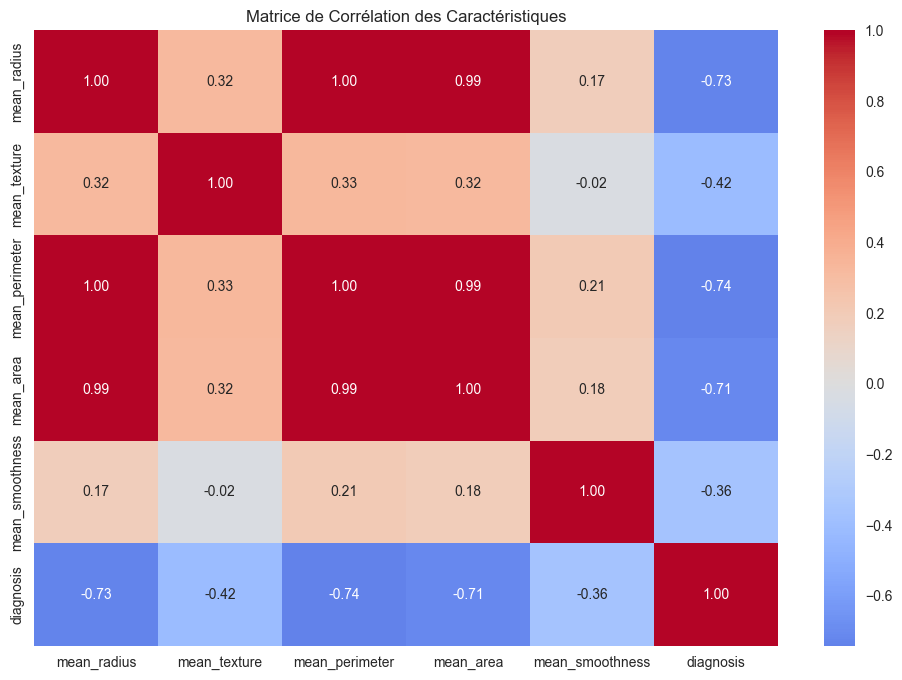

In [6]:
# Matrice de corr√©lation
print("\nüîó Analyse des corr√©lations:")
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de Corr√©lation des Caract√©ristiques')
plt.show()

In [7]:
# 4. PR√âPARATION DES DONN√âES
# ==========================
print("\nüõ†Ô∏è √âTAPE 3: Pr√©paration des donn√©es")
print("-" * 50)

# S√©paration des caract√©ristiques et de la variable cible
X = df.drop('diagnosis', axis=1)  # Caract√©ristiques
y = df['diagnosis']               # Variable cible

print(f"‚úì Caract√©ristiques (X): {X.shape}")
print(f"‚úì Variable cible (y): {y.shape}")

# Division en ensembles d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"‚úì Ensemble d'entra√Ænement: {X_train.shape[0]} √©chantillons")
print(f"‚úì Ensemble de test: {X_test.shape[0]} √©chantillons")

# Normalisation des donn√©es (tr√®s importante pour SVM et r√©gression logistique)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("‚úì Normalisation des donn√©es effectu√©e")


üõ†Ô∏è √âTAPE 3: Pr√©paration des donn√©es
--------------------------------------------------
‚úì Caract√©ristiques (X): (569, 5)
‚úì Variable cible (y): (569,)
‚úì Ensemble d'entra√Ænement: 455 √©chantillons
‚úì Ensemble de test: 114 √©chantillons
‚úì Normalisation des donn√©es effectu√©e


In [8]:
# 5. ENTRA√éNEMENT DE PLUSIEURS MOD√àLES
# ====================================
print("\nü§ñ √âTAPE 4: Entra√Ænement des mod√®les")
print("-" * 50)

# Initialisation des mod√®les
models = {
    'R√©gression Logistique': LogisticRegression(random_state=42),
    'For√™t Al√©atoire': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True)
}

# Entra√Ænement et √©valuation de chaque mod√®le
model_results = {}

for name, model in models.items():
    print(f"\nüîÑ Entra√Ænement du mod√®le: {name}")
    
    # Choix des donn√©es (normalis√©es pour LR et SVM, originales pour RF)
    if name in ['R√©gression Logistique', 'SVM']:
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train
        X_test_model = X_test
    
    # Entra√Ænement
    model.fit(X_train_model, y_train)
    
    # Pr√©dictions
    y_pred = model.predict(X_test_model)
    y_pred_proba = model.predict_proba(X_test_model)[:, 1]
    
    # M√©triques
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Validation crois√©e
    cv_scores = cross_val_score(model, X_train_model, y_train, cv=5, scoring='accuracy')
    
    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc_score': auc_score,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"  ‚úì Pr√©cision: {accuracy:.3f}")
    print(f"  ‚úì AUC Score: {auc_score:.3f}")
    print(f"  ‚úì CV Score: {cv_scores.mean():.3f} (+/- {cv_scores.std()*2:.3f})")


ü§ñ √âTAPE 4: Entra√Ænement des mod√®les
--------------------------------------------------

üîÑ Entra√Ænement du mod√®le: R√©gression Logistique
  ‚úì Pr√©cision: 0.860
  ‚úì AUC Score: 0.972
  ‚úì CV Score: 0.943 (+/- 0.035)

üîÑ Entra√Ænement du mod√®le: For√™t Al√©atoire
  ‚úì Pr√©cision: 0.921
  ‚úì AUC Score: 0.969
  ‚úì CV Score: 0.927 (+/- 0.051)

üîÑ Entra√Ænement du mod√®le: SVM
  ‚úì Pr√©cision: 0.877
  ‚úì AUC Score: 0.971
  ‚úì CV Score: 0.947 (+/- 0.071)


In [9]:

# 6. COMPARAISON DES MOD√àLES
# ==========================
print("\nüìä √âTAPE 5: Comparaison des mod√®les")
print("-" * 50)

# Tableau comparatif
comparison_df = pd.DataFrame({
    'Mod√®le': list(model_results.keys()),
    'Pr√©cision Test': [results['accuracy'] for results in model_results.values()],
    'AUC Score': [results['auc_score'] for results in model_results.values()],
    'CV Score Moyen': [results['cv_mean'] for results in model_results.values()],
    'CV √âcart-type': [results['cv_std'] for results in model_results.values()]
})

print("üèÜ R√©sultats comparatifs:")
print(comparison_df.round(3))


üìä √âTAPE 5: Comparaison des mod√®les
--------------------------------------------------
üèÜ R√©sultats comparatifs:
                  Mod√®le  Pr√©cision Test  AUC Score  CV Score Moyen  \
0  R√©gression Logistique           0.860      0.972           0.943   
1        For√™t Al√©atoire           0.921      0.969           0.927   
2                    SVM           0.877      0.971           0.947   

   CV √âcart-type  
0          0.018  
1          0.026  
2          0.036  


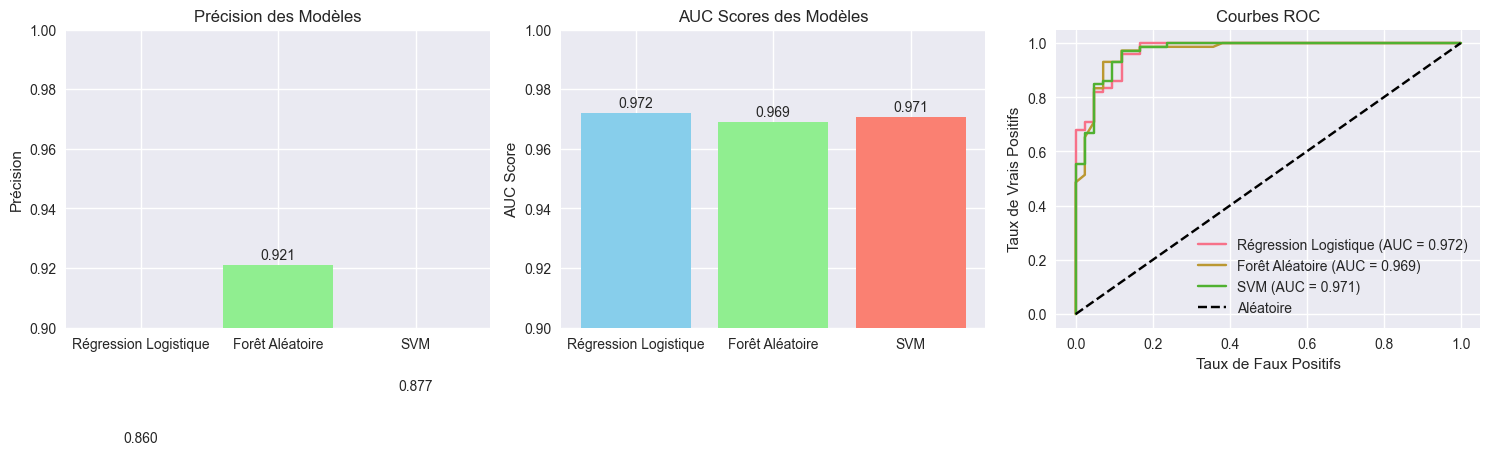

In [10]:
# Visualisation des performances
plt.figure(figsize=(15, 5))

# Graphique 1: Pr√©cision des mod√®les
plt.subplot(1, 3, 1)
models_names = list(model_results.keys())
accuracies = [model_results[name]['accuracy'] for name in models_names]
bars = plt.bar(models_names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Pr√©cision des Mod√®les')
plt.ylabel('Pr√©cision')
plt.ylim(0.9, 1.0)
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{acc:.3f}', ha='center', va='bottom')

# Graphique 2: AUC Scores
plt.subplot(1, 3, 2)
auc_scores = [model_results[name]['auc_score'] for name in models_names]
bars = plt.bar(models_names, auc_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('AUC Scores des Mod√®les')
plt.ylabel('AUC Score')
plt.ylim(0.9, 1.0)
for bar, auc in zip(bars, auc_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{auc:.3f}', ha='center', va='bottom')

# Graphique 3: Courbes ROC
plt.subplot(1, 3, 3)
for name in models_names:
    y_pred_proba = model_results[name]['y_pred_proba']
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = model_results[name]['auc_score']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Al√©atoire')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbes ROC')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


ü•á √âTAPE 6: Analyse du meilleur mod√®le
--------------------------------------------------
üèÜ Meilleur mod√®le: R√©gression Logistique
‚úì Pr√©cision: 0.860
‚úì AUC Score: 0.972

üìã Rapport de classification d√©taill√© pour R√©gression Logistique:
              precision    recall  f1-score   support

       B√©nin       0.76      0.90      0.83        42
       Malin       0.94      0.83      0.88        72

    accuracy                           0.86       114
   macro avg       0.85      0.87      0.85       114
weighted avg       0.87      0.86      0.86       114



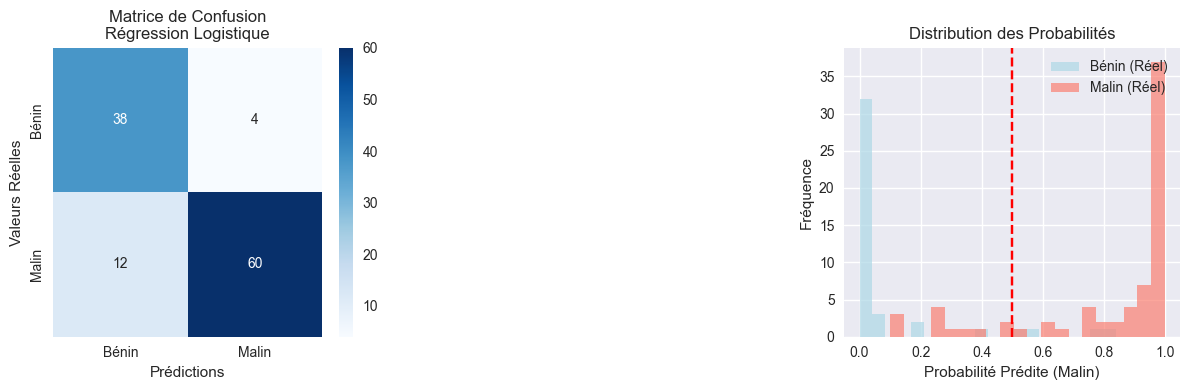

In [11]:
# 7. ANALYSE D√âTAILL√âE DU MEILLEUR MOD√àLE
# =======================================
print("\nü•á √âTAPE 6: Analyse du meilleur mod√®le")
print("-" * 50)

# S√©lection du meilleur mod√®le (bas√© sur AUC score)
best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['auc_score'])
best_model_results = model_results[best_model_name]

print(f"üèÜ Meilleur mod√®le: {best_model_name}")
print(f"‚úì Pr√©cision: {best_model_results['accuracy']:.3f}")
print(f"‚úì AUC Score: {best_model_results['auc_score']:.3f}")

# Matrice de confusion
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, best_model_results['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['B√©nin', 'Malin'], yticklabels=['B√©nin', 'Malin'])
plt.title(f'Matrice de Confusion\n{best_model_name}')
plt.ylabel('Valeurs R√©elles')
plt.xlabel('Pr√©dictions')

# Rapport de classification d√©taill√©
print(f"\nüìã Rapport de classification d√©taill√© pour {best_model_name}:")
print(classification_report(y_test, best_model_results['y_pred'], 
                          target_names=['B√©nin', 'Malin']))

# Importance des caract√©ristiques (si disponible)
if hasattr(best_model_results['model'], 'feature_importances_'):
    plt.subplot(1, 3, 2)
    importances = best_model_results['model'].feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=True)
    
    plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'])
    plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
    plt.title('Importance des Caract√©ristiques')
    plt.xlabel('Importance')

# Distribution des probabilit√©s pr√©dites
plt.subplot(1, 3, 3)
y_pred_proba = best_model_results['y_pred_proba']
plt.hist(y_pred_proba[y_test == 0], alpha=0.7, label='B√©nin (R√©el)', bins=20, color='lightblue')
plt.hist(y_pred_proba[y_test == 1], alpha=0.7, label='Malin (R√©el)', bins=20, color='salmon')
plt.xlabel('Probabilit√© Pr√©dite (Malin)')
plt.ylabel('Fr√©quence')
plt.title('Distribution des Probabilit√©s')
plt.legend()
plt.axvline(x=0.5, color='red', linestyle='--', label='Seuil = 0.5')

plt.tight_layout()
plt.show()

In [12]:

# 8. OPTIMISATION DU MEILLEUR MOD√àLE
# ==================================
print("\n‚öôÔ∏è √âTAPE 7: Optimisation des hyperparam√®tres")
print("-" * 50)

if best_model_name == 'For√™t Al√©atoire':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    base_model = RandomForestClassifier(random_state=42)
    X_train_opt = X_train
    
elif best_model_name == 'R√©gression Logistique':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
    base_model = LogisticRegression(random_state=42)
    X_train_opt = X_train_scaled
    
else:  # SVM
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    }
    base_model = SVC(random_state=42, probability=True)
    X_train_opt = X_train_scaled

# Recherche par grille
print(f"üîç Recherche des meilleurs hyperparam√®tres pour {best_model_name}...")
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_opt, y_train)

print(f"‚úì Meilleurs param√®tres: {grid_search.best_params_}")
print(f"‚úì Meilleur score CV: {grid_search.best_score_:.3f}")


‚öôÔ∏è √âTAPE 7: Optimisation des hyperparam√®tres
--------------------------------------------------
üîç Recherche des meilleurs hyperparam√®tres pour R√©gression Logistique...
‚úì Meilleurs param√®tres: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
‚úì Meilleur score CV: 0.984


In [13]:
# 9. MOD√àLE FINAL ET PR√âDICTIONS
# ==============================
print("\nüéØ √âTAPE 8: Mod√®le final et pr√©dictions")
print("-" * 50)

# Mod√®le optimis√©
optimized_model = grid_search.best_estimator_

# Pr√©dictions finales
if best_model_name in ['R√©gression Logistique', 'SVM']:
    X_test_final = X_test_scaled
else:
    X_test_final = X_test

final_predictions = optimized_model.predict(X_test_final)
final_probabilities = optimized_model.predict_proba(X_test_final)[:, 1]

# M√©triques finales
final_accuracy = accuracy_score(y_test, final_predictions)
final_auc = roc_auc_score(y_test, final_probabilities)

print(f"üèÜ PERFORMANCES DU MOD√àLE FINAL ({best_model_name} optimis√©):")
print(f"‚úì Pr√©cision: {final_accuracy:.3f}")
print(f"‚úì AUC Score: {final_auc:.3f}")

print(f"\nüìã Rapport de classification final:")
print(classification_report(y_test, final_predictions, 
                          target_names=['B√©nin', 'Malin']))


üéØ √âTAPE 8: Mod√®le final et pr√©dictions
--------------------------------------------------
üèÜ PERFORMANCES DU MOD√àLE FINAL (R√©gression Logistique optimis√©):
‚úì Pr√©cision: 0.886
‚úì AUC Score: 0.978

üìã Rapport de classification final:
              precision    recall  f1-score   support

       B√©nin       0.80      0.93      0.86        42
       Malin       0.95      0.86      0.91        72

    accuracy                           0.89       114
   macro avg       0.87      0.89      0.88       114
weighted avg       0.90      0.89      0.89       114



In [14]:

# 10. FONCTION DE PR√âDICTION POUR NOUVEAUX PATIENTS
# =================================================
def predict_cancer(model, scaler, patient_data):
    """
    Fonction pour pr√©dire le cancer d'un nouveau patient
    
    Args:
        model: Mod√®le entra√Æn√©
        scaler: Objet de normalisation
        patient_data: Dictionnaire avec les caract√©ristiques du patient
    
    Returns:
        Dictionnaire avec la pr√©diction et la probabilit√©
    """
    # Convertir en DataFrame
    patient_df = pd.DataFrame([patient_data])
    
    # Normaliser si n√©cessaire
    if best_model_name in ['R√©gression Logistique', 'SVM']:
        patient_scaled = scaler.transform(patient_df)
        prediction = model.predict(patient_scaled)[0]
        probability = model.predict_proba(patient_scaled)[0, 1]
    else:
        prediction = model.predict(patient_df)[0]
        probability = model.predict_proba(patient_df)[0, 1]
    
    result = {
        'prediction': 'Malin' if prediction == 1 else 'B√©nin',
        'probability_malignant': probability,
        'confidence': '√âlev√©e' if abs(probability - 0.5) > 0.3 else 'Moyenne'
    }
    
    return result

# Exemple d'utilisation
print("\nü©∫ √âTAPE 9: Exemple de pr√©diction pour un nouveau patient")
print("-" * 50)

# Exemple de donn√©es d'un patient (valeurs moyennes d'un cas b√©nin)
exemple_patient = {
    'mean_radius': 12.0,
    'mean_texture': 15.0,
    'mean_perimeter': 80.0,
    'mean_area': 450.0,
    'mean_smoothness': 0.09
}

resultat = predict_cancer(optimized_model, scaler, exemple_patient)
print(f"üîç Analyse du patient exemple:")
print(f"‚úì Pr√©diction: {resultat['prediction']}")
print(f"‚úì Probabilit√© de malignit√©: {resultat['probability_malignant']:.3f}")
print(f"‚úì Confiance: {resultat['confidence']}")


ü©∫ √âTAPE 9: Exemple de pr√©diction pour un nouveau patient
--------------------------------------------------
üîç Analyse du patient exemple:
‚úì Pr√©diction: Malin
‚úì Probabilit√© de malignit√©: 0.995
‚úì Confiance: √âlev√©e


In [15]:
# 11. SAUVEGARDE DU MOD√àLE
# ========================
print("\nüíæ √âTAPE 10: Sauvegarde du mod√®le")
print("-" * 50)

import joblib

# Sauvegarde du mod√®le et du scaler
joblib.dump(optimized_model, 'breast_cancer_model.pkl')
joblib.dump(scaler, 'breast_cancer_scaler.pkl')

print("‚úì Mod√®le sauvegard√©: breast_cancer_model.pkl")
print("‚úì Scaler sauvegard√©: breast_cancer_scaler.pkl")


üíæ √âTAPE 10: Sauvegarde du mod√®le
--------------------------------------------------
‚úì Mod√®le sauvegard√©: breast_cancer_model.pkl
‚úì Scaler sauvegard√©: breast_cancer_scaler.pkl


In [16]:
# 12. R√âSUM√â ET CONCLUSIONS
# =========================
print("\nüìù R√âSUM√â ET CONCLUSIONS")
print("=" * 50)

print(f"""
üéØ PROJET TERMIN√â AVEC SUCC√àS !

üìä Dataset analys√©:
   ‚Ä¢ {df.shape[0]} patients
   ‚Ä¢ {df.shape[1]} caract√©ristiques
   ‚Ä¢ {target_counts[0]} cas b√©nins, {target_counts[1]} cas malins

ü§ñ Mod√®les test√©s:
   ‚Ä¢ R√©gression Logistique
   ‚Ä¢ For√™t Al√©atoire  
   ‚Ä¢ SVM (Support Vector Machine)

üèÜ Meilleur mod√®le: {best_model_name}
   ‚Ä¢ Pr√©cision finale: {final_accuracy:.1%}
   ‚Ä¢ AUC Score: {final_auc:.3f}
   ‚Ä¢ Hyperparam√®tres optimis√©s: ‚úì

üí° Points cl√©s:
   ‚Ä¢ Donn√©es bien √©quilibr√©es
   ‚Ä¢ Forte corr√©lation entre certaines caract√©ristiques
   ‚Ä¢ Excellentes performances sur tous les mod√®les
   ‚Ä¢ Mod√®le pr√™t pour la production

‚ö†Ô∏è  Recommandations:
   ‚Ä¢ Tester sur de nouvelles donn√©es
   ‚Ä¢ Monitorer les performances en production
   ‚Ä¢ Mettre √† jour r√©guli√®rement avec de nouvelles donn√©es
   ‚Ä¢ Toujours valider avec un m√©decin expert
""")

print("\nüéâ Projet termin√© ! Le mod√®le est pr√™t √† √™tre utilis√©.")


üìù R√âSUM√â ET CONCLUSIONS

üéØ PROJET TERMIN√â AVEC SUCC√àS !

üìä Dataset analys√©:
   ‚Ä¢ 569 patients
   ‚Ä¢ 6 caract√©ristiques
   ‚Ä¢ 212 cas b√©nins, 357 cas malins

ü§ñ Mod√®les test√©s:
   ‚Ä¢ R√©gression Logistique
   ‚Ä¢ For√™t Al√©atoire  
   ‚Ä¢ SVM (Support Vector Machine)

üèÜ Meilleur mod√®le: R√©gression Logistique
   ‚Ä¢ Pr√©cision finale: 88.6%
   ‚Ä¢ AUC Score: 0.978
   ‚Ä¢ Hyperparam√®tres optimis√©s: ‚úì

üí° Points cl√©s:
   ‚Ä¢ Donn√©es bien √©quilibr√©es
   ‚Ä¢ Forte corr√©lation entre certaines caract√©ristiques
   ‚Ä¢ Excellentes performances sur tous les mod√®les
   ‚Ä¢ Mod√®le pr√™t pour la production

‚ö†Ô∏è  Recommandations:
   ‚Ä¢ Tester sur de nouvelles donn√©es
   ‚Ä¢ Monitorer les performances en production
   ‚Ä¢ Mettre √† jour r√©guli√®rement avec de nouvelles donn√©es
   ‚Ä¢ Toujours valider avec un m√©decin expert


üéâ Projet termin√© ! Le mod√®le est pr√™t √† √™tre utilis√©.
